In [15]:
import numpy as np
import scipy.linalg
import scipy.sparse as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
np.set_printoptions(precision=3)

# b) simulate the dynamics

In [16]:
Delta = 0
g = 1
def H(n):
    return np.array([[-Delta, np.sqrt(n)*g/2], [np.sqrt(n)*g/2,0]])
#print(H(2))
psi0= np.array([1,0])

def psi0(n):
    return np.array([1,0])
def U(n,t):
    return scipy.linalg.expm(-1j*H(n)*t)
#print(Ut(2,3))

def psi_t(t,n):
    return U(n,t).dot(psi0(n))
print(psi_t(2,2))



[0.156+0.j    0.   -0.988j]


# c) simulate the evolution of the initial state (...)

Text(0, 0.5, 'probability to be in |g,n>')

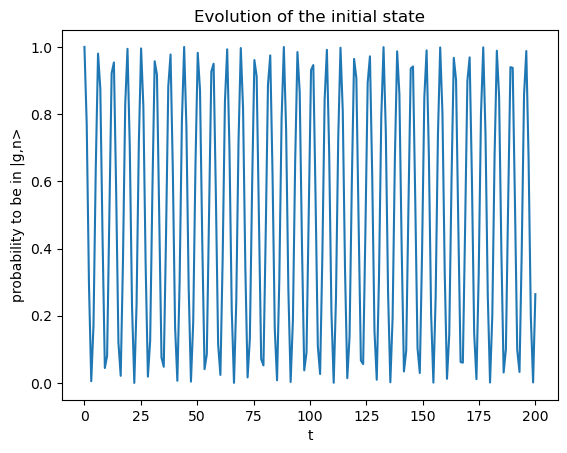

In [17]:
def p_g(t,n):
    return np.abs(psi_t(t,n)[0])**2

x = []
t = np.linspace(0,200,200)
i=0

while i < 200:
    x.append(p_g(i,1))
    i = i +1
        #print(i)
#print(x)
plt.plot(t,x,label=f"n")
plt.xlabel("t")
plt.title("Evolution of the initial state")
plt.ylabel("probability to be in |g,n>")



# verify the scaling

In [18]:
omega = 100
def H(n):
    return np.array([[-omega+n, np.sqrt(n)*g/2], [np.sqrt(n)*g/2,n]])
psi_minus = -1/np.sqrt(2)*(np.array([1,0])-np.array([0,1]))
psi_plus = 1/np.sqrt(2)*(np.array([1,0])+np.array([0,1]))
def E_minus(n):
    return (psi_minus.conjugate().T @ H(n) @ (psi_minus))
def E_plus(n):
    return (psi_plus.conjugate().T @ H(n) @ (psi_plus))
def Err(n):
    return E_plus(n)-E_minus(n)-np.sqrt(n)
def Diff(n):
    return E_plus(n)-E_minus(n)
d = []
for n in np.linspace(1,10,10):
    d.append(Diff(n))
    #print(n)
print(d)
f = []
for n in np.linspace(1,10,10):
    f.append(Err(n))
    #print(n)
print(f)

[1.0, 1.4142135623730994, 1.7320508075688608, 2.000000000000007, 2.2360679774998005, 2.4494897427831717, 2.6457513110646076, 2.8284271247461916, 2.999999999999993, 3.162277660168371]
[0.0, 4.218847493575595e-15, -1.6431300764452317e-14, 7.105427357601002e-15, 1.0658141036401503e-14, -6.217248937900877e-15, 1.687538997430238e-14, 1.3322676295501878e-15, -7.105427357601002e-15, -8.43769498715119e-15]


The two printed arrays are (first) the differences in the Energies of the plus and the minus state for a given n and (second) the difference of that value to sqrt(n). It can be seen that the second array contains exclusively very small numbers, approximately 0, so the energy difference agrees with sqrt(n)

# d)

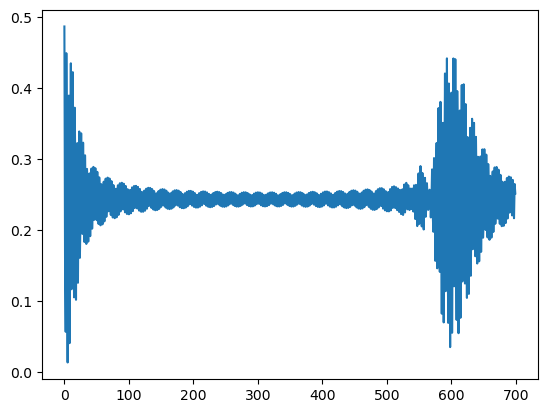

In [40]:
alpha = 10
g = 0.2
def psi0(n):
    return np.array([1,0])
def U(n,t):
    return scipy.linalg.expm(-1j*H(n)*t)
#print(Ut(2,3))

def psi_t(t,n):
    return U(n,t).dot(psi0(n))
#print(psi_t(2,2))
def cg0(n):
    return np.exp(-(1/2)*np.abs(alpha)**2)*alpha**n/np.sqrt(np.sqrt(2*np.pi*n)*(n/np.exp(1))**n)
#Get the time evoltution of the coefficients by solving the diff.eq (see notes)
def cng(t,n):
    return np.cos(np.sqrt(n)*g*t/2)*cg0(n)
def s(n,t):
    return 0.5*((np.exp(-np.abs(alpha)**2))*(alpha**(2*n)/(np.sqrt(2*np.pi*n)*(n/np.exp(1))**n))*(1+np.cos(np.sqrt(n)*g*t)))
#print(s(1,1))

def approx(t):
    sum = 0
    for n in range(1,100):
        sum = sum + s(n,t)
    return sum

t = range(0,700)
plt.plot(t, approx(t))
